## Temperature Reading-IOT Device-EDA

***Temperature readings of an entreprise building room ( admin), both iniside and outside. This was recorded at random intervals. The recording speed was per second.***

    This dataset has temperature readings of an entreprise building room, both iniside and outside the building at random intervals. The recording speed was per second.
    Dataset details:
    id : unique IDs for each reading
    room_id/id : room id in which device was installed.
    noted_date : date and time of reading
    temp : temperature readings
    out/in : whether reading was taken from device installed inside or outside of room
    
    
    Variance of temp for inside - outside room temp?
    How outside temp was related to inside temp?

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the training and validation set
df = pd.read_csv('IOT-temp.csv', parse_dates=["noted_date"])
df.head(5)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In


In [3]:
df.shape

(97606, 5)

In [4]:
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [5]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated()].count()
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


id            1
room_id/id    1
noted_date    1
temp          1
out/in        1
dtype: int64

In [6]:
df=df.drop_duplicates()
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,2018-07-28 07:07:00,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,2018-07-28 07:07:00,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,2018-07-28 07:06:00,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,2018-07-28 07:06:00,31,In


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97605 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97605 non-null  object        
 1   room_id/id  97605 non-null  object        
 2   noted_date  97605 non-null  datetime64[ns]
 3   temp        97605 non-null  int64         
 4   out/in      97605 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.5+ MB


There are no NaNs in the dataset

In [8]:
display(df[["noted_date"]].agg(['min', 'max']).transpose())

,min,max
noted_date,2018-01-11 00:06:00,2018-12-10 23:55:00


In [9]:
#Inside/outside Temperature
display(df.groupby("out/in")["noted_date"].agg(["min", "max"]))

,min,max
out/in,,
In,2018-01-11 00:06:00,2018-12-10 21:33:00
Out,2018-01-11 00:07:00,2018-12-10 23:55:00


In [10]:
# Sorting the dataframe by noted_date
df=df.sort_values(by=["noted_date"]).reset_index(drop=True)

In [11]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
1,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out
2,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out
3,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out
4,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out


In [12]:
df.tail()

,id,room_id/id,noted_date,temp,out/in
97600,__export__.temp_log_41241_36e995ef,Room Admin,2018-12-10 23:41:00,44,Out
97601,__export__.temp_log_41244_1cef6363,Room Admin,2018-12-10 23:43:00,44,Out
97602,__export__.temp_log_41249_7d6819cd,Room Admin,2018-12-10 23:49:00,44,Out
97603,__export__.temp_log_41250_eed95540,Room Admin,2018-12-10 23:51:00,45,Out
97604,__export__.temp_log_41254_5b6ff69c,Room Admin,2018-12-10 23:55:00,44,Out


In [13]:
# Dropping columns
df = df.drop(
    columns=["id", "room_id/id"],
    errors="ignore"
)

In [14]:
df

,noted_date,temp,out/in
0,2018-01-11 00:06:00,32,In
1,2018-01-11 00:07:00,40,Out
2,2018-01-11 00:09:00,39,Out
3,2018-01-11 00:13:00,40,Out
4,2018-01-11 00:23:00,40,Out
...,...,...,...
97600,2018-12-10 23:41:00,44,Out
97601,2018-12-10 23:43:00,44,Out
97602,2018-12-10 23:49:00,44,Out
97603,2018-12-10 23:51:00,45,Out


## Missing Values-Data Analysis 

In [15]:
df.isnull().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97605 entries, 0 to 97604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   noted_date  97605 non-null  datetime64[ns]
 1   temp        97605 non-null  int64         
 2   out/in      97605 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ MB


In [17]:
df['Dates'] = pd.to_datetime(df['noted_date'], format='%Y:%M:%D').dt.date
df['Hours'] = pd.to_datetime(df['noted_date'], format='%Y:%M:%D').dt.time
df.drop('noted_date',axis=1,inplace=True)
df

,temp,out/in,Dates,Hours
0,32,In,2018-01-11,00:06:00
1,40,Out,2018-01-11,00:07:00
2,39,Out,2018-01-11,00:09:00
3,40,Out,2018-01-11,00:13:00
4,40,Out,2018-01-11,00:23:00
...,...,...,...,...
97600,44,Out,2018-12-10,23:41:00
97601,44,Out,2018-12-10,23:43:00
97602,44,Out,2018-12-10,23:49:00
97603,45,Out,2018-12-10,23:51:00


In [18]:
try:
    df['Dates'] = pd.to_datetime(df['Dates'])
    df['year'] = df['Dates'].dt.year
    df['month'] = df.Dates.dt.month
    df['day'] = df.Dates.dt.day
    df.drop('Dates',axis=1,inplace=True)
    df.rename(columns = {'out/in':'in/out'}, inplace = True)
except:
    print('Operations already performed')
df.head()

,temp,in/out,Hours,year,month,day
0,32,In,00:06:00,2018,1,11
1,40,Out,00:07:00,2018,1,11
2,39,Out,00:09:00,2018,1,11
3,40,Out,00:13:00,2018,1,11
4,40,Out,00:23:00,2018,1,11


In [19]:
sorted(df['day'].unique())


[8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [20]:
sorted(df['month'].unique())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [21]:
sorted(df['year'].unique())

[2018]

In [22]:
#since the entire data is about 2018 we can drop the year column
df.drop('year',axis=1,inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["in/out"] = encoder.fit_transform(df["in/out"])

In [24]:
df

,temp,in/out,Hours,month,day
0,32,0,00:06:00,1,11
1,40,1,00:07:00,1,11
2,39,1,00:09:00,1,11
3,40,1,00:13:00,1,11
4,40,1,00:23:00,1,11
...,...,...,...,...,...
97600,44,1,23:41:00,12,10
97601,44,1,23:43:00,12,10
97602,44,1,23:49:00,12,10
97603,45,1,23:51:00,12,10


***0---->in            1--->out***


##  Data Visualization

<AxesSubplot:>

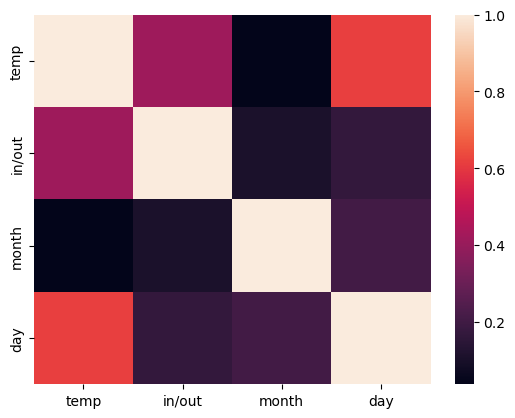

In [25]:
sns.heatmap(df.corr())

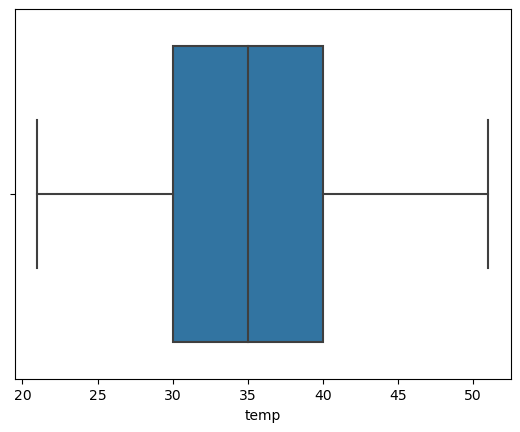

In [26]:
sns.boxplot(x=df['temp'])
plt.show();

<AxesSubplot:xlabel='in/out', ylabel='count'>

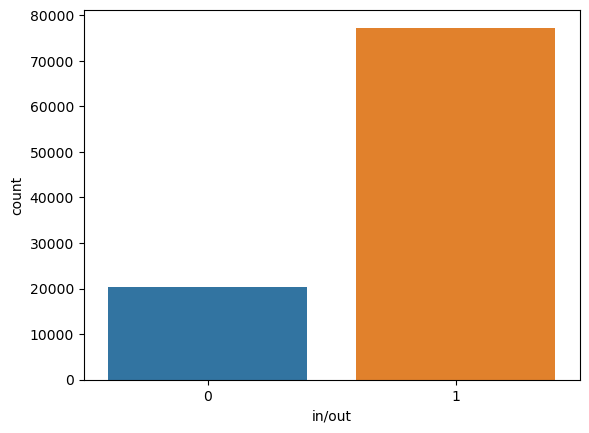

In [27]:
sns.countplot(x=df['in/out'])

<AxesSubplot:xlabel='day', ylabel='temp'>

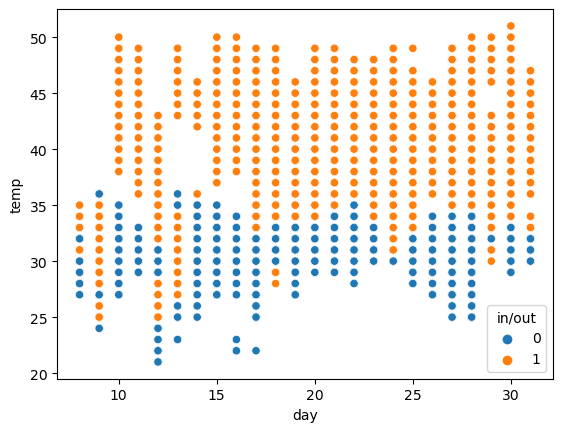

In [28]:
sns.scatterplot(x=df['day'],y=df['temp'],hue=df['in/out'])

<AxesSubplot:xlabel='month', ylabel='temp'>

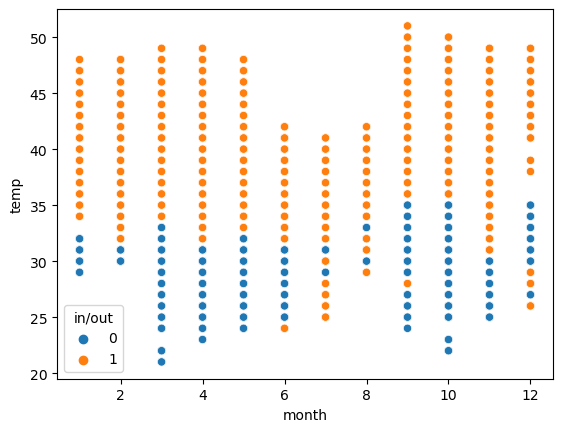

In [29]:
sns.scatterplot(x=df['month'],y=df['temp'],hue=df['in/out'])

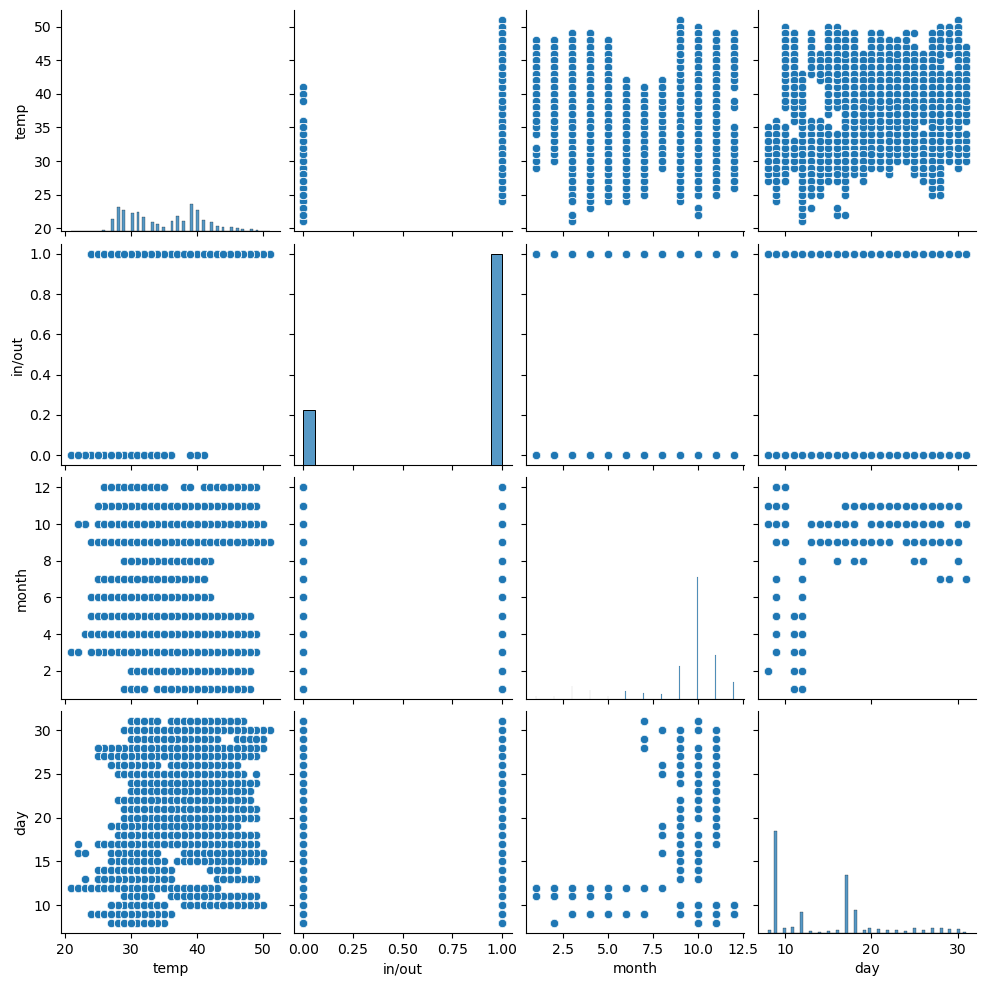

In [30]:
sns.pairplot(df)

In [31]:
df["in/out"].var()

0.16499573414028115

In [32]:
arr = df['in/out']
a=[]
b=[]
for i in arr:
    if i==1:
        b.append(i)
    else :
        a.append(i)
a=pd.Series(a)
b=pd.Series(b)
type(arr)

pandas.core.series.Series

<AxesSubplot:xlabel='day', ylabel='temp'>

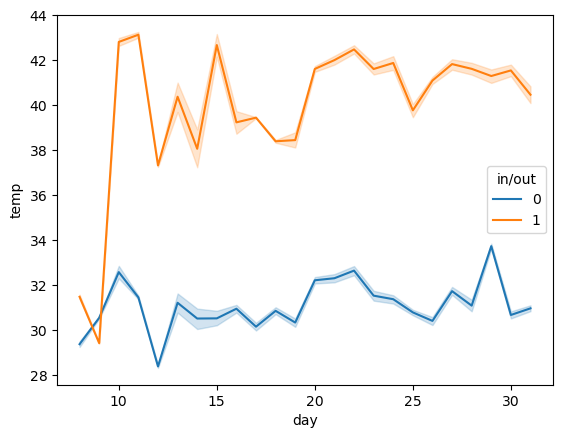

In [33]:
sns.lineplot(x=df['day'],y=df['temp'],hue=df['in/out'])

# 0---->in            1--->out

Text(0.5, 1.0, 'Location v/s Temp')

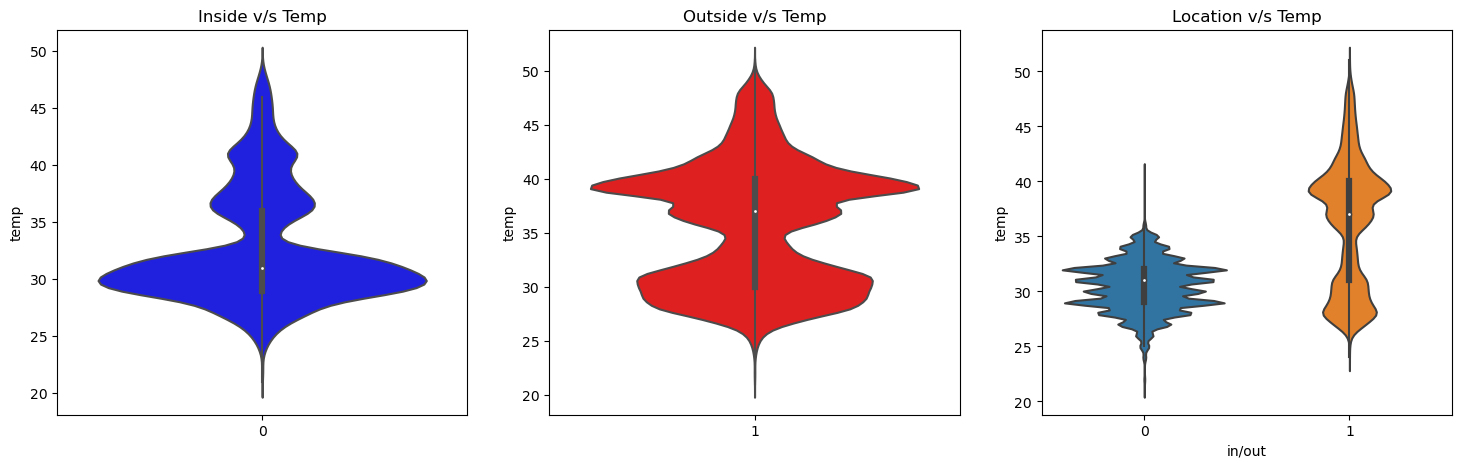

In [34]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.violinplot(x=a,y=df['temp'],ax=axes[0],color='b').set_title("Inside v/s Temp")
sns.violinplot(x=b,y=df['temp'],ax=axes[1],color='r').set_title("Outside v/s Temp")
sns.violinplot(x=df['in/out'],y=df['temp'],ax=axes[2]).set_title("Location v/s Temp")


#    0---->in            1--->out

Outcome:  Inside temp is free from any variations in data so follows a flat/linear trend, and outside temp show a bit variations and shows some seasionality with trends.

    ID column was not used as useful information, but it was used as a unique identifier for each row.
   
    We got some useful information such as seasonal information or timing information for analysis from datetime column.
   
    Inside temperature is composed of a single distribution, while outside temperature is composed of multiple distributions.
    
    Outside temperature can be more affected by seasonal temperature fluctuations than inside temperature.

In [35]:
df

,temp,in/out,Hours,month,day
0,32,0,00:06:00,1,11
1,40,1,00:07:00,1,11
2,39,1,00:09:00,1,11
3,40,1,00:13:00,1,11
4,40,1,00:23:00,1,11
...,...,...,...,...,...
97600,44,1,23:41:00,12,10
97601,44,1,23:43:00,12,10
97602,44,1,23:49:00,12,10
97603,45,1,23:51:00,12,10


In [36]:
df.var()

C:\Users\User\AppData\Local\Temp\ipykernel_11876\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


temp      32.487847
in/out     0.164996
month      6.217029
day       35.391205
dtype: float64

In [37]:
x=df["temp"].values
x.shape
x = x.reshape(-1,1)
x.shape

(97605, 1)

In [38]:
y=df['in/out'].values
y

array([0, 1, 1, ..., 1, 1, 1])

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x)
x = sc.transform(x)
print(x[0:5])

[[-0.5357854 ]
 [ 0.86777706]
 [ 0.69233175]
 [ 0.86777706]
 [ 0.86777706]]


## Splitting data into training and testing

In [40]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)
print(x_train[0:5])

[[ 1.39411298]
 [ 1.04322237]
 [-1.41301193]
 [ 1.39411298]
 [-1.23756663]]


In [41]:
print(len(x_train))

68323


In [42]:
print(len(y_train))

68323


In [43]:
print(len(x_test))

29282


In [44]:
print(len(y_test))

29282


 Since this is a cassification problem and we dont have diverse data ,Training our classifier on Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver = 'liblinear')
clf.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [46]:
from sklearn.model_selection import cross_validate
reg_cross_validate = cross_validate(clf , x , y , cv=5)
reg_cross_validate

{'fit_time': array([0.05582166, 0.05189061, 0.05189538, 0.05083394, 0.05585289]),
 'score_time': array([0.00199366, 0.00196338, 0.00199199, 0.00299239, 0.00199389]),
 'test_score': array([0.73689872, 0.67476051, 0.79381179, 0.79237744, 0.57958096])}

In [47]:
y_pred_logreg = clf.predict(x_test)
y_pred_logreg

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_logreg,y_test))

0.7720784099446759


## Using Support Vector Machine for Classification

In [49]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [50]:
from sklearn.model_selection import cross_validate
svc_cross_validate = cross_validate(svm_clf , x , y , cv=5)
svc_cross_validate

{'fit_time': array([ 721.47559047, 1084.35306096,  705.93521214,  510.79874539,
         327.92891026]),
 'score_time': array([142.05822086, 120.39318013, 163.56612396, 159.81710911,
        155.27740955]),
 'test_score': array([0.69832488, 0.72854874, 0.79155781, 0.76246094, 0.77721428])}

In [51]:
y_pred_svc = svm_clf.predict(x_test)
y_pred_svc

array([1, 1, 0, ..., 1, 1, 0])

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_svc,y_test))

0.8047947544566628


In [ ]:
## when compared with the above two models SVM seems to perform well.